In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
ins =  pd.read_csv('/Users/shkhader/DataScience/DataScience/NoorDheen/insurance/insurance.csv')

### expense Prediction score rate  based on adding the X factor in below order 

##### bmi = 3 %
##### smoker = 65%
##### age = 74%

In [66]:
ins.head()

,age,bmi,children,region,expenses,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.9,0,southwest,16884.92,0,1,1,0
1,18,33.8,1,southeast,1725.55,1,0,0,1
2,28,33.0,3,southeast,4449.46,1,0,0,1
3,33,22.7,0,northwest,21984.47,1,0,0,1
4,32,28.9,0,northwest,3866.86,1,0,0,1


In [107]:
ins.query("sex_male ==1 & smoker_yes==0 ").mean()

age             39.061896
bmi             30.772340
children         1.092843
expenses      8087.204971
smoker_no        1.000000
smoker_yes       0.000000
sex_female       0.000000
sex_male         1.000000
dtype: float64

In [96]:
ins.query("sex_male ==1 & smoker_yes==1 ").mean()

age              38.446541
bmi              31.507547
children          1.188679
expenses      33042.006226
smoker_no         0.000000
smoker_yes        1.000000
sex_female        0.000000
sex_male          1.000000
dtype: float64

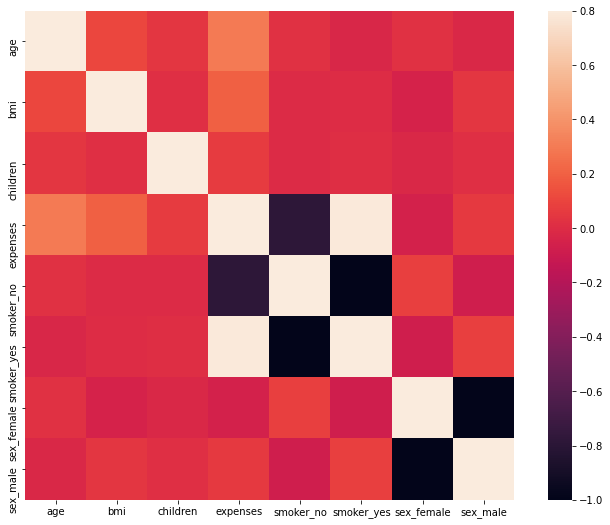

In [99]:
#correlation matrix
corrmat = ins.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [65]:
#One Hot Coding:
ins = pd.get_dummies(ins, columns=['sex'])

In [6]:
from sklearn.linear_model import LinearRegression


In [8]:
model = LinearRegression()

In [109]:
model.fit(ins[['bmi','smoker_no','smoker_yes','age','sex_female','sex_male']],ins['expenses'])

LinearRegression()

In [111]:
model.coef_

array([   323.12740129, -11916.39630943,  11916.39630943,    259.43857897,
           54.53395558,    -54.53395558])

In [112]:
model.intercept_

226.16353498893113

In [142]:
model_pred_bmi = model.predict(ins[['bmi','smoker_no','smoker_yes','age','sex_female','sex_male']])

In [143]:
actual_expenses = ins['expenses']

In [119]:
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

In [144]:
mean_absolute_error(actual_expenses,model_pred_bmi)

4216.486623307998

In [145]:
mean_absolute_error(actual_expenses,model_pred_bmi)

4216.486623307998

In [146]:
mean_squared_error(actual_expenses,model_pred_bmi)

37000464.870904595

In [147]:
np.sqrt(mean_squared_error(actual_expenses,model_pred_bmi))

6082.8007423311665

In [148]:
r2_score(actual_expenses,model_pred_bmi)* 100

74.7510806996227

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ins['bmi'],ins['expenses'], color='black')
plt.plot(ins[['bmi']],model_pred_bmi, color='y')